<a href="https://colab.research.google.com/github/muthikellasrihari/IMAGE-CLASSIFICATION-MODEL/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print("TensorFlow version:", tf.__version__)
print("GPU Available:", len(tf.config.experimental.list_physical_devices('GPU')) > 0)

TensorFlow version: 2.19.0
GPU Available: False



1. LOADING AND PREPROCESSING DATA
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Number of classes: 10

After preprocessing:
Training data range: [0.00, 1.00]
Labels shape after one-hot encoding: (50000, 10)


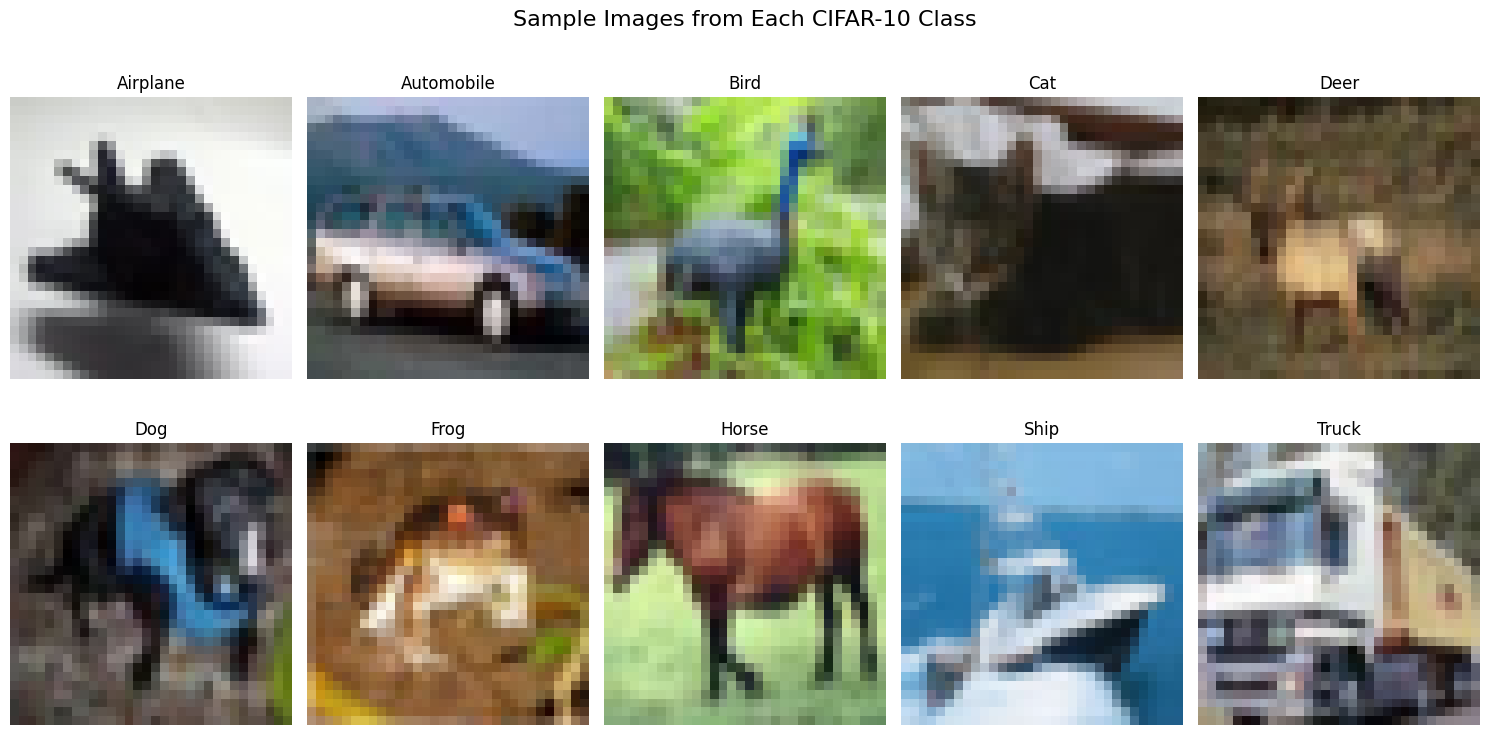

In [ ]:
# =============================================================================
# 1. DATA LOADING & PREPROCESSING
# =============================================================================

print("\n" + "="*50)
print("1. LOADING AND PREPROCESSING DATA")
print("="*50)

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# CIFAR-10 class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Number of classes: {len(class_names)}")

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

print(f"\nAfter preprocessing:")
print(f"Training data range: [{x_train.min():.2f}, {x_train.max():.2f}]")
print(f"Labels shape after one-hot encoding: {y_train_categorical.shape}")

# Visualize sample images from each class
plt.figure(figsize=(15, 8))
for i in range(10):
    # Find first occurrence of each class
    idx = np.where(y_train == i)[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx])
    plt.title(f'{class_names[i]}')
    plt.axis('off')
plt.suptitle('Sample Images from Each CIFAR-10 Class', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# =============================================================================
# 2. CNN ARCHITECTURE DESIGN
# =============================================================================

print("\n" + "="*50)
print("2. BUILDING CNN ARCHITECTURE")
print("="*50)

def create_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    """
    Creates a CNN model for CIFAR-10 classification

    Args:
        input_shape: Shape of input images (height, width, channels)
        num_classes: Number of output classes

    Returns:
        Compiled Keras model
    """

    model = keras.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Flatten and Fully Connected Layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')  # Output layer
    ])

    return model

# Create the model
model = create_cnn_model()

# Display model architecture
print("Model Architecture:")
model.summary()

# Visualize model architecture
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, dpi=100)
plt.show()


2. BUILDING CNN ARCHITECTURE
Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,472,938 (5.62 MB)

 Trainable params: 1,471,466 (5.61 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
# =============================================================================
# 3. MODEL COMPILATION & TRAINING
# =============================================================================

print("\n" + "="*50)
print("3. COMPILING AND TRAINING THE MODEL")
print("="*50)

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks for better training
callbacks = [
    # Reduce learning rate when validation loss plateaus
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=0.0001,
        verbose=1
    ),
    # Early stopping to prevent overfitting
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

# Train the model
print("Starting training...")
history = model.fit(
    x_train, y_train_categorical,
    batch_size=32,
    epochs=2,  # Will stop early if no improvement
    validation_data=(x_test, y_test_categorical),
    callbacks=callbacks,
    verbose=1
)

print("Training completed!")


3. COMPILING AND TRAINING THE MODEL
Starting training...
Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 406s 257ms/step - accuracy: 0.3999 - loss: 1.6590 - val_accuracy: 0.5957 - val_loss: 1.1457 - learning_rate: 0.0010
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 402s 257ms/step - accuracy: 0.5959 - loss: 1.1462 - val_accuracy: 0.6555 - val_loss: 0.9907 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 2.
Training completed!



4. EVALUATING MODEL PERFORMANCE
Test Accuracy: 0.6555
Test Loss: 0.9907
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step

Classification Report:
              precision    recall  f1-score   support

    Airplane       0.85      0.53      0.65      1000
  Automobile       0.91      0.76      0.83      1000
        Bird       0.60      0.30      0.40      1000
         Cat       0.54      0.36      0.44      1000
        Deer       0.53      0.70      0.61      1000
         Dog       0.60      0.56      0.58      1000
        Frog       0.48      0.92      0.63      1000
       Horse       0.78      0.68      0.72      1000
        Ship       0.76      0.84      0.80      1000
       Truck       0.74      0.90      0.81      1000

    accuracy                           0.66     10000
   macro avg       0.68      0.66      0.65     10000
weighted avg       0.68      0.66      0.65     10000



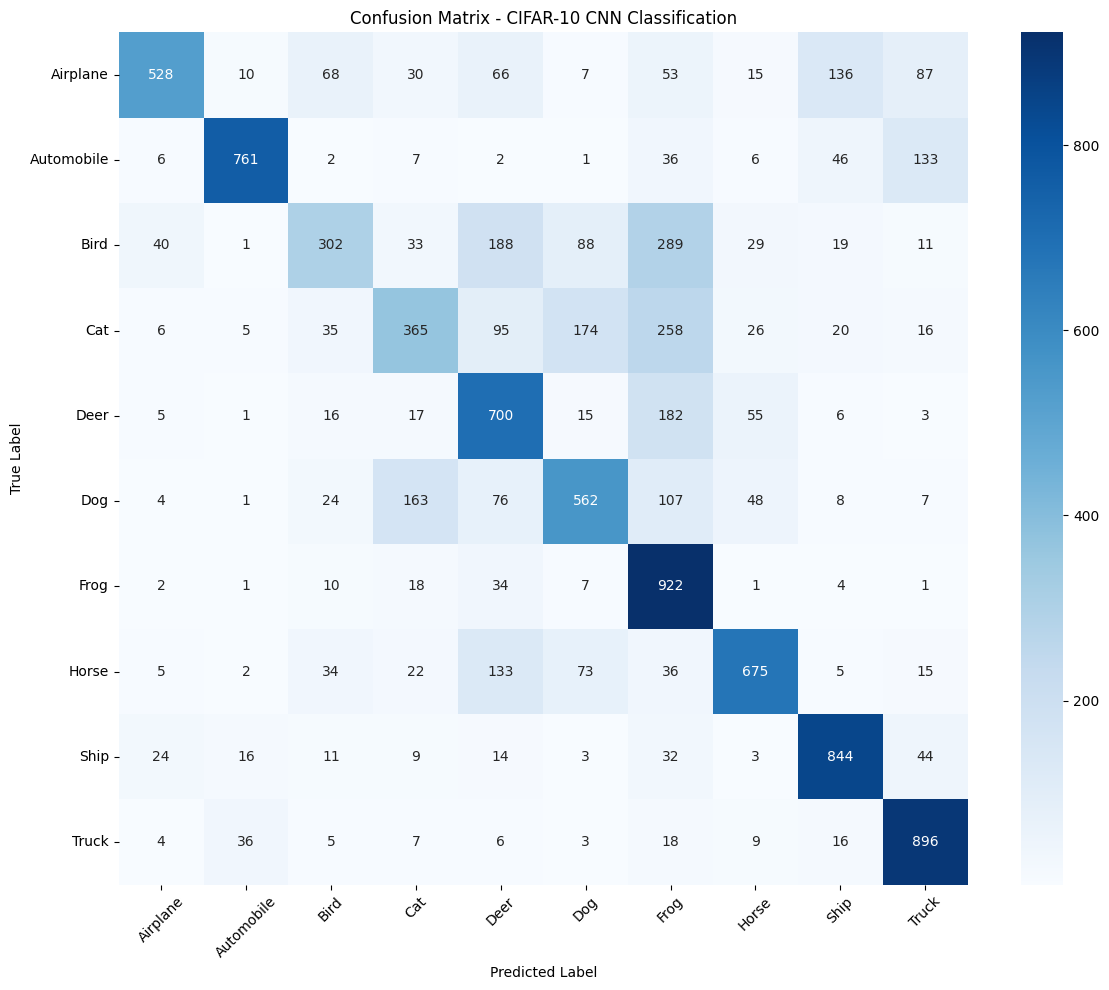


Per-class Accuracy:
Airplane: 0.5280
Automobile: 0.7610
Bird: 0.3020
Cat: 0.3650
Deer: 0.7000
Dog: 0.5620
Frog: 0.9220
Horse: 0.6750
Ship: 0.8440
Truck: 0.8960


In [ ]:
# =============================================================================
# 4. MODEL EVALUATION
# =============================================================================

print("\n" + "="*50)
print("4. EVALUATING MODEL PERFORMANCE")
print("="*50)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_categorical, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# Confusion Matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - CIFAR-10 CNN Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
print("\nPer-class Accuracy:")
for i, acc in enumerate(class_accuracy):
    print(f"{class_names[i]}: {acc:.4f}")


5. VISUALIZING TRAINING PROGRESS


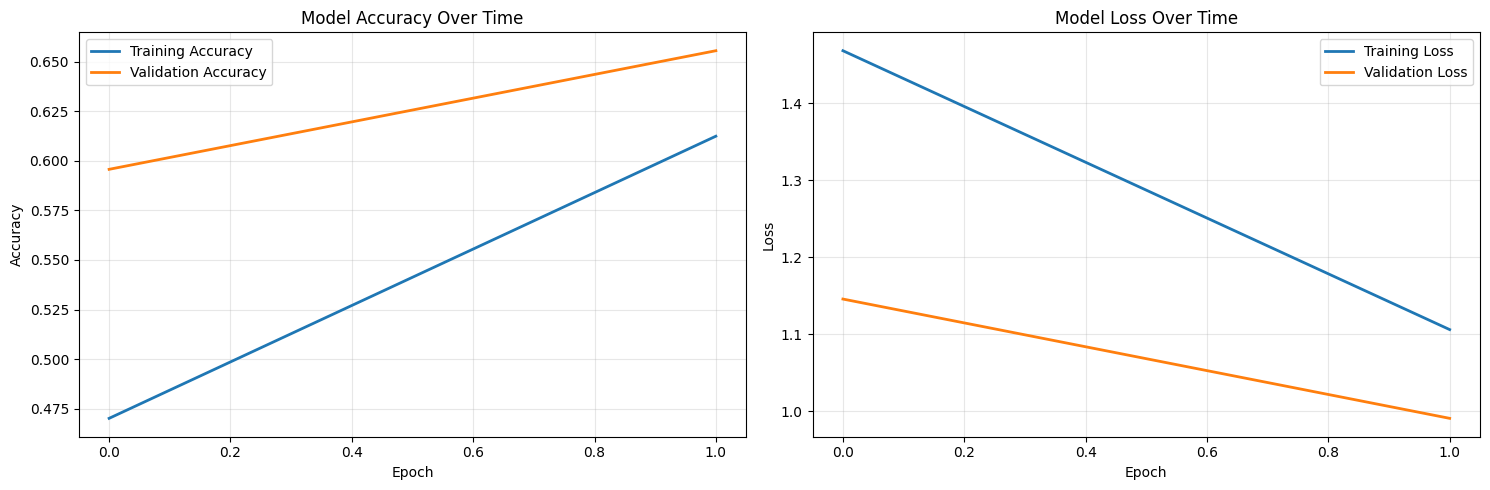

In [ ]:
# =============================================================================
# 5. TRAINING VISUALIZATION
# =============================================================================

print("\n" + "="*50)
print("5. VISUALIZING TRAINING PROGRESS")
print("="*50)

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
ax1.set_title('Model Accuracy Over Time')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Loss plot
ax2.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax2.set_title('Model Loss Over Time')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


6. VISUALIZING SAMPLE PREDICTIONS
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


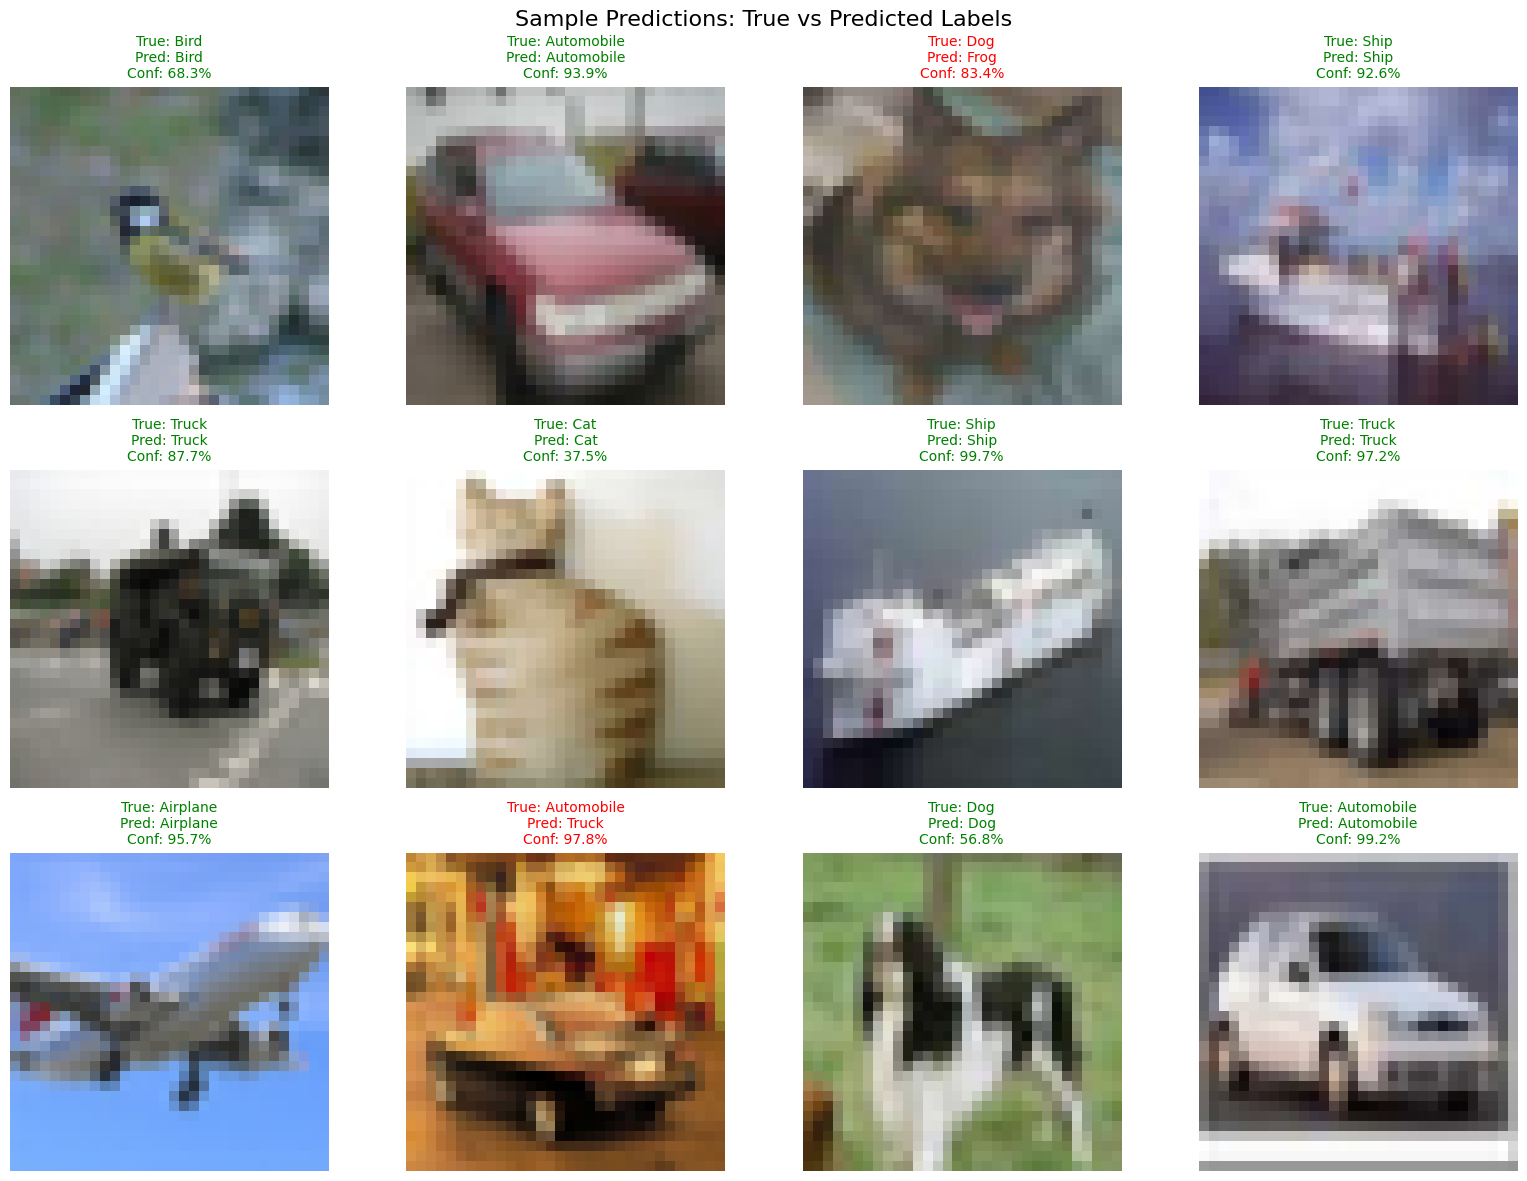

Accuracy on displayed samples: 83.33% (10/12)


In [ ]:
# =============================================================================
# 6. SAMPLE PREDICTIONS VISUALIZATION
# =============================================================================

print("\n" + "="*50)
print("6. VISUALIZING SAMPLE PREDICTIONS")
print("="*50)

def plot_sample_predictions(model, x_test, y_test, class_names, num_samples=12):
    """
    Plot sample predictions with true vs predicted labels
    """
    # Select random samples
    indices = np.random.choice(len(x_test), num_samples, replace=False)

    # Make predictions
    predictions = model.predict(x_test[indices])
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = y_test[indices].flatten()

    # Plot results
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    axes = axes.ravel()

    for i in range(num_samples):
        # Display image
        axes[i].imshow(x_test[indices[i]])

        # Get prediction confidence
        confidence = np.max(predictions[i]) * 100

        # Set title with true vs predicted labels
        true_label = class_names[true_classes[i]]
        pred_label = class_names[predicted_classes[i]]

        # Color: green if correct, red if incorrect
        color = 'green' if true_classes[i] == predicted_classes[i] else 'red'

        axes[i].set_title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%',
                         color=color, fontsize=10)
        axes[i].axis('off')

    plt.suptitle('Sample Predictions: True vs Predicted Labels', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Print accuracy for these samples
    correct_predictions = np.sum(true_classes == predicted_classes)
    sample_accuracy = correct_predictions / num_samples
    print(f"Accuracy on displayed samples: {sample_accuracy:.2%} ({correct_predictions}/{num_samples})")

# Show sample predictions
plot_sample_predictions(model, x_test, y_test, class_names)

In [ ]:
# =============================================================================
# 7. ADDITIONAL ANALYSIS
# =============================================================================

print("\n" + "="*50)
print("7. ADDITIONAL ANALYSIS")
print("="*50)

# Top-k accuracy analysis
def calculate_top_k_accuracy(y_true, y_pred, k=3):
    """Calculate top-k accuracy"""
    top_k_pred = np.argsort(y_pred, axis=1)[:, -k:]
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] in top_k_pred[i]:
            correct += 1
    return correct / len(y_true)

top_3_accuracy = calculate_top_k_accuracy(y_true_classes, y_pred, k=3)
print(f"Top-3 Accuracy: {top_3_accuracy:.4f}")

# Model complexity analysis
total_params = model.count_params()
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_variables])
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Training efficiency
total_epochs = len(history.history['loss'])
best_val_acc = max(history.history['val_accuracy'])
print(f"Training stopped after {total_epochs} epochs")
print(f"Best validation accuracy: {best_val_acc:.4f}")

print("\n" + "="*50)
print("ANALYSIS COMPLETE!")
print("="*50)
print("Key Results:")
print(f"• Final Test Accuracy: {test_accuracy:.4f}")
print(f"• Top-3 Test Accuracy: {top_3_accuracy:.4f}")
print(f"• Best Validation Accuracy: {best_val_acc:.4f}")
print(f"• Total Training Epochs: {total_epochs}")
print(f"• Model Parameters: {total_params:,}")
print("="*50)


7. ADDITIONAL ANALYSIS
Top-3 Accuracy: 0.9021
Total parameters: 1,472,938
Trainable parameters: 1,471,466
Training stopped after 2 epochs
Best validation accuracy: 0.6555

ANALYSIS COMPLETE!
Key Results:
• Final Test Accuracy: 0.6555
• Top-3 Test Accuracy: 0.9021
• Best Validation Accuracy: 0.6555
• Total Training Epochs: 2
• Model Parameters: 1,472,938
